In [2]:
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
import sys
import yaml

In [157]:
Myeloid = sc.read('C:/Users/xbh04/Desktop/myeloid.h5ad')
Myeloid = Myeloid.obs['Manually_curated_celltype'].unique().tolist()

In [155]:
TCells = sc.read('C:/Users/xbh04/Desktop/t-cells.h5ad')
TCells = TCells.obs['Manually_curated_celltype'].unique().tolist()

In [156]:
TCells

['Trm_Th1/Th17',
 'Trm_gut_CD8',
 'Trm_Tgd',
 'T_CD4/CD8',
 'Trm/em_CD8',
 'Cycling T&NK',
 'Tregs',
 'Teffector/EM_CD4',
 'Tem/emra_CD8',
 'Tfh',
 'ILC3',
 'Tnaive/CM_CD4',
 'Tgd_CRTAM+',
 'NK_CD16+',
 'Tnaive/CM_CD8',
 'MAIT',
 'NK_CD56bright_CD16-',
 'Tnaive/CM_CD4_activated']

In [158]:
BCells = sc.read('C:/Users/xbh04/Desktop/b-cells.h5ad')
BCells = BCells.obs['Manually_curated_celltype'].unique().tolist()

In [1]:
CellTypist_Data = {
'Cross-tissue Immune Cell Atlas': {
    "Myeloid": {
        'Macrophages': {
            'Erythrophagocytic macrophages': {"Details": None},
            'Intermediate macrophages': {"Details": None},
            'Alveolar macrophages': {"Details": None},
            'Intestinal macrophages': {"Details": None}
            },
        'Dendritic cell': {
            'DC1': {"Details": None},
            'DC2': {"Details": None},
            'migDC': {"Details": None}
            },
        "Monocytes": {
            'Classical monocytes': {"Details": None},
            'Nonclassical monocytes': {"Details": None}
            },
        'Cycling': {"Details": None}
        # 'MNP/T doublets': {"Details": None}
        },
    "T & Innate lymphoid cells": {
        "CD4": {
            'Trm_Th1/Th17': {"Details": None},
            'Teffector/EM_CD4': {"Details": None},
            'T Naive': {
                'Tnaive/CM_CD4': {"Details": None},
                'Tnaive/CM_CD4_activated': {"Details": None}
            },
            'Tregs': {"Details": None}, 
            'Tfh': {"Details": None}
            },
        "CD8": {
            "Tissue-resident memory T (Trm) cells": {
                'Trm_gut_CD8': {"Details": None},
                'Trm/em_CD8': {"Details": None}
            },
            'Tnaive/CM_CD8': {"Details": None},
            'Tem/emra_CD8': {"Details": None},
            'Trm_Tgd': {"Details": None},
            'Tgd_CRTAM+': {"Details": None}, 
            'MAIT': {"Details": None}
        },
        "NK": {
            'NK_CD16+': {"Details": None},
            'NK_CD56bright_CD16-': {"Details": None}
        },
        'ILC3': {"Details": None},
        'Cycling T&NK': {"Details": None},
        'T_CD4/CD8': {"Details": None}
        },
    "B cell": {
        'Germinal center B cell': {
            'GC_B (I)': {"Details": None},
            'GC_B (II)': {"Details": None}
            },
        'Memory B cells': {"Details": None},
        'Naive B cells': {"Details": None},
        'Plasma cells': {"Details": None},
        'ABCs': {"Details": None},
        'Plasmablasts': {"Details": None},
        'Pro-B': {"Details": None},
        'Pre-B': {"Details": None}
        # 'MNP/B doublets': {"Details": None},
        # 'T/B doublets': {"Details": None}
        }
    }
}


# yaml.dump(CellTypist_Data)
# with open('output.yaml', 'w') as f:
#     data = yaml.dump(CellTypist_Data, f)

In [ ]:
yaml.dump(CellTypist_Data)
with open('output.yaml', 'w') as f:
    data = yaml.dump(CellTypist_Data, f)

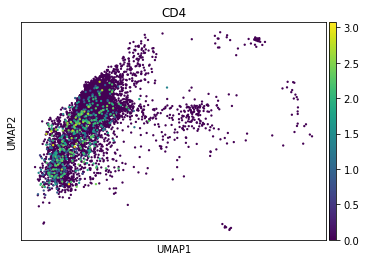

In [16]:
# Check T-CD4/CD8

T_CD4_CD8 = TCells[TCells.obs['Manually_curated_celltype'] == 'T_CD4/CD8']
sc.pl.umap(T_CD4_CD8, color='CD4')

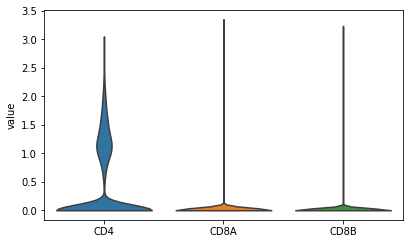

In [146]:
sc.pl.violin(TCells[TCells.obs['Manually_curated_celltype'] == 'Tregs'], ['CD4', 'CD8A', 'CD8B'], stripplot=False)

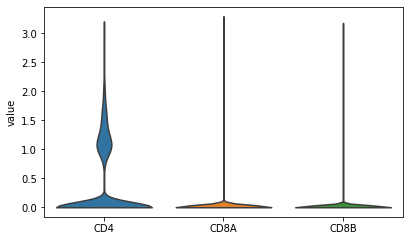

In [147]:
sc.pl.violin(TCells[TCells.obs['Manually_curated_celltype'] == 'Tfh'], ['CD4', 'CD8A', 'CD8B'],stripplot=False)

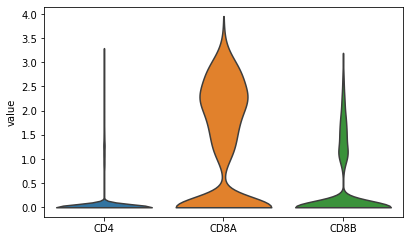

In [149]:
sc.pl.violin(TCells[TCells.obs['Manually_curated_celltype'] == 'MAIT'], ['CD4', 'CD8A', 'CD8B'],stripplot=False)

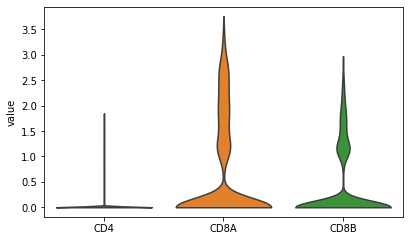

In [151]:
sc.pl.violin(TCells[TCells.obs['Manually_curated_celltype'] == 'Tgd_CRTAM+'], ['CD4', 'CD8A', 'CD8B'], stripplot=False)

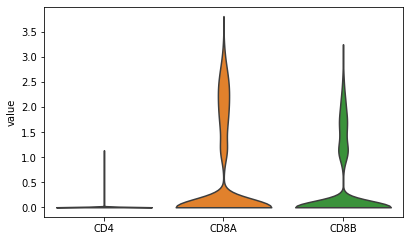

In [150]:
sc.pl.violin(TCells[TCells.obs['Manually_curated_celltype'] == 'Trm_Tgd'], ['CD4', 'CD8A', 'CD8B'], stripplot=False)

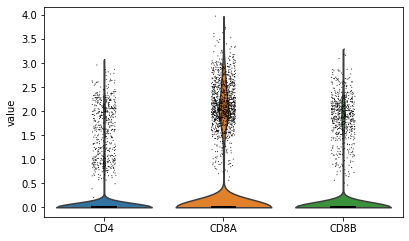

In [154]:
sc.pl.violin(TCells[TCells.obs['Manually_curated_celltype'] == 'T_CD4/CD8'], ['CD4', 'CD8A', 'CD8B'])

-------------------------HUMAN GUT ATLAS---------------------------

In [17]:
gutData = sc.read('C:/Users/xbh04/Desktop/fetal_RAWCOUNTS_cellxgene.h5ad')
gutData = gutData.obs[['cell_type_group', 'cell_name', 'cell_name_detailed']]

In [21]:
cell_type_group = gutData.loc[:, 'cell_type_group'].unique().tolist()

In [104]:
group_to_name = []
for cell_type in cell_type_group:
    map = dict({cell_type: gutData[gutData.loc[:, "cell_type_group"]==cell_type].loc[:, 'cell_name'].unique().tolist()})
    group_to_name.append(map)

name_to_detailed = []
for cell_name in gutData.loc[:, 'cell_name'].unique().tolist():
    map = dict({cell_name: gutData[gutData.loc[:, "cell_name"]==cell_name].loc[:, 'cell_name_detailed'].unique().tolist()})
    name_to_detailed.append(map)

In [95]:
all_names = gutData.loc[:, "cell_name"].unique().tolist()

In [94]:
all_details = gutData.loc[:, "cell_name_detailed"].unique().tolist()

In [102]:
def findKeys(loD, k):
    for d in loD:
        if str(*d) == k:
            return d.values()

In [81]:
print(*findKeys(name_to_detailed, 'mesoderm 2'))

['Mesoderm 2']


In [93]:
HGA_Data_Orig = {
    'Human Gut Atlas': {
        'mesenchymal': {
            'WNT4 FLC': {
                'WNT4+ fibroblasts': {"Details": None}
            },
            'FOXL1 FLC': {
                'FOXL1+ fibroblasts': {"Details": None}
            },
            'FRZB FLC': {
                'FRZB+ fibroblasts': {"Details": None}
            },
            'UPK3B Serosa': {
                'Serosa/mesothelial cells': {"Details": None}
            },
            'ICC': {
                'Interstitial cells of Cajal': {"Details": None}
            },
            'mesoderm 1': {'Details': None},
            'mesoderm 2': {"Details": None},
            'Smooth muscle cells': {"Details": None},
            'Neural crest cells':{"Details": None},
            'Enteric neurons': {"Details": None},
            'pericyte': {"Details": None},
            'myofibroblast': {"Details": None}
        },
        'immune': {
            'immune cells':{"Details": None}, 
            'Erythroblasts': {"Details": None}, 
            'WNT4 FLC': {
                'WNT4+ fibroblasts':{"Details": None}
            }
        }, 
        'epithelium': {
            'Uniform progenitors': {
                'Uniform progenitors':{"Details": None},
                'G2M/S enterocytes':{"Details": None}, 
                'Early enterocyte':{"Details": None}, 
                'NTS+ epithelial cells':{"Details": None}, 
                'Enteroendocrine':{"Details": None}, 
                'LGR5 stem':{"Details": None}, 
                'Goblet':{"Details": None}
            },
            'Small intestinal Epi': {
                'Uniform progenitors':{"Details": None}, 
                'Enterocytes':{"Details": None}, 
                'Enterocyte':{"Details": None}, 
                'G2M/S enterocytes':{"Details": None}, 
                'Early enterocyte':{"Details": None}, 
                'LGR5 stem':{"Details": None}, 
                'Goblet':{"Details": None}, 
                'NTS+ epithelial cells':{"Details": None}, 
                'Enteroendocrine':{"Details": None}
            },
            'Colonic Epi': {
                'Colonocytes':{"Details": None}
            },
            'Secretory Epi': {
                'BEST4+ enterocyte':{"Details": None}, 
                'Enteroendocrine':{"Details": None}, 
                'Goblet':{"Details": None}, 
                'LGR5 stem':{"Details": None}, 
                'Early enterocyte':{"Details": None}, 
                'Enterocyte':{"Details": None}, 
                'NTS+ epithelial cells':{"Details": None}, 
                'G2M/S enterocytes':{"Details": None}, 
                'Uniform progenitors':{"Details": None}
            },
            'SMC': {
                'Smooth muscle cells':{"Details": None}
            }
        }, 
        'vasculature': {
            'Venous EC': {
                'Venous endothelial cell':{"Details": None}
            },
            'pericyte': {"Details": None},
            'Arterial EC': {
                'Arterial endothelial cell': {"Details": None}
            },
            'Lymphatic EC': {
                'Lymphatic endothelial cell': {"Details": None}
            },
            'FOXL1 FLC': {
                'FOXL1+ fibroblasts': {"Details": None}
            },
            'mesoderm 2': {"Details": None}
        }
    }
}

yaml.dump(HGA_Data_Orig)
with open('HGA_Original.yaml', 'w') as f:
    data = yaml.dump(HGA_Data_Orig, f)

In [134]:
gutData[gutData.loc[:, "cell_name_detailed"] == 'Goblet'].loc[:, "cell_name"].unique().tolist()

['Secretory Epi', 'Small intestinal Epi', 'Uniform progenitors']

In [135]:
HGA_Data = {
    'Human Gut Atlas': {
        'endothelial': {
            'Arterial endothelial cell': {"Details": None},
            'Lymphatic endothelial cell': {"Details": None},
            'Venous endothelial cell': {"Details": None}
        },
        'fibroblasts': {
            'FOXL1+ fibroblasts': {"Details": None},
            'FRZB+ fibroblasts': {"Details": None},
            'WNT4+ fibroblasts': {"Details": None},
            'Myofibroblast': {"Details": None}
        },
        'Mesoderm': {
            'Mesoderm 1': {"Details": None},
            'Mesoderm 2': {"Details": None}
        },
        'contractile cell': {
            'Smooth muscle cells': {"Details": None},
            'Pericyte': {"Details": None}
        },
        'epithelial': {
                'enterocyte': {
                    'Secretory Epi': {
                        'BEST4+ enterocyte': {"Details": None},
                        'Early enterocyte': {"Details": None},
                        'Enterocyte': {"Details": None},
                        'G2M/S enterocytes': {"Details": None},
                        'NTS+ epithelial cells': {"Details": None},
                        'Enteroendocrine': {"Details": None},
                        'Goblet': {"Details": None}
                        },
                    'Small intestinal Epi':{
                        'Early enterocyte': {"Details": None},
                        'Enterocyte': {"Details": None},
                        'Enterocytes': {"Details": None},
                        'G2M/S enterocytes': {"Details": None},
                        'NTS+ epithelial cells': {"Details": None},
                        'Enteroendocrine': {"Details": None},
                        'Goblet': {"Details": None}
                        }
                    },
                    'Colonic Epi':{
                        'Colonocytes': {"Details": None}
                    },
            'Interstitial cells of Cajal': {"Details": None},
            'Serosa/mesothelial cells': {"Details": None},
        },
        'Uniform progenitors': {
            'Early enterocyte': {"Details": None},
            'G2M/S enterocytes': {"Details": None},
            'NTS+ epithelial cells': {"Details": None},
            'Enteroendocrine': {"Details": None}
        },
        'Enteric neurons': {"Details": None},
        'Neural crest cells': {"Details": None},
        'Erythroblasts': {"Details": None},
        'Immune cells': {"Details": None},
        'LGR5 stem': {"Details": None}
    }
}


yaml.dump(HGA_Data)
with open('HGA_Data.yaml', 'w') as f:
    data = yaml.dump(HGA_Data, f)

In [100]:
all_details

['Arterial endothelial cell',
 'BEST4+ enterocyte',
 'Colonocytes',
 'Early enterocyte',
 'Enteric neurons',
 'Enterocyte',
 'Enterocytes',
 'Enteroendocrine',
 'Erythroblasts',
 'FOXL1+ fibroblasts',
 'FRZB+ fibroblasts',
 'G2M/S enterocytes',
 'Goblet',
 'Immune cells',
 'Interstitial cells of Cajal',
 'LGR5 stem',
 'Lymphatic endothelial cell',
 'Mesoderm 1',
 'Mesoderm 2',
 'Myofibroblast',
 'NTS+ epithelial cells',
 'Neural crest cells',
 'Pericyte',
 'Serosa/mesothelial cells',
 'Smooth muscle cells',
 'Uniform progenitors',
 'Venous endothelial cell',
 'WNT4+ fibroblasts']